In [4]:
import os
from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('future.no_silent_downcasting', True)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import itertools

In [5]:
data = pd.read_csv("data/2024-06-15_17-29-01_unscaled_totalPuracheses-Purchasesweb-store-catalog.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2208


,ID,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,Complain,Age,Marital_Categories,Edu_Categories,Spent_Total,Living_Alone,Having_Kids,AcceptedOffer,Total_Purchases
0,5524,58138.0,734750,58,635,88,546,172,88,88,...,7,0,58,0,1,1617,0,0,1,22
1,2174,46344.0,735300,38,11,1,6,2,1,6,...,5,0,61,0,1,27,1,1,0,4
2,4141,71613.0,735101,26,426,49,127,111,21,42,...,4,0,50,1,1,776,1,0,0,20
3,6182,26646.0,735274,26,11,4,20,10,3,5,...,6,0,31,1,1,53,1,1,0,6
4,5324,58293.0,735252,94,173,43,118,46,27,15,...,5,0,34,1,3,422,1,1,0,14


In [6]:
def boxplot (column):
    # Assuming 'data' is your DataFrame and it has a column named 'Income'
    sns.boxplot(y=data[column])
    # Adding titles and labels
    plt.title(f'Box Plot of ' + column)
    plt.ylabel(column)
    # Show the plot
    plt.show()

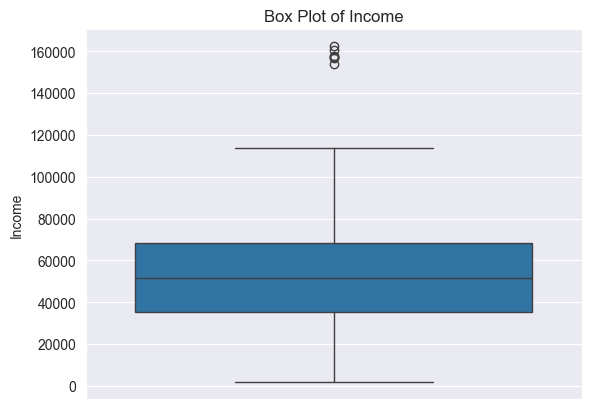

In [7]:
boxplot('Income')

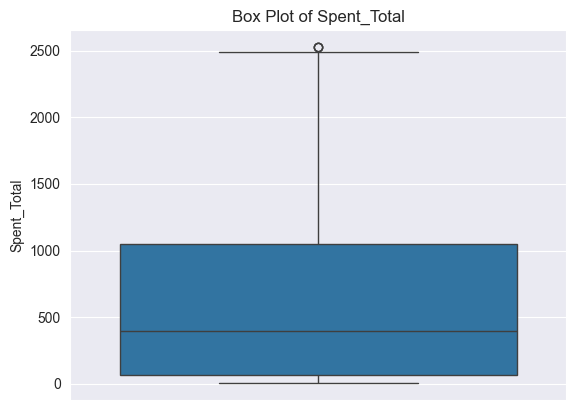

In [8]:
boxplot('Spent_Total')

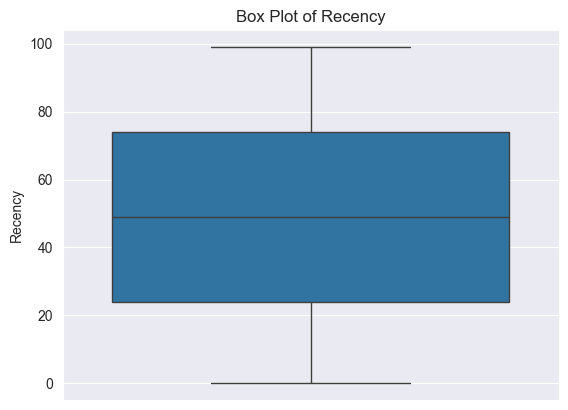

In [9]:
boxplot('Recency')

In [10]:
#Scaling
max_abs_scaler = MaxAbsScaler()
data_maxabs = max_abs_scaler.fit_transform(data)

In [11]:
eps = 1.0
min_samples = len(data.columns) * 2
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
data_dbscan = data
data_dbscan['Cluster'] = dbscan.fit_predict(data_maxabs)
clusters_dbscan = data_dbscan['Cluster'].unique()

In [12]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
data_kmeans = data
data_kmeans['Cluster'] = kmeans.fit_predict(data_maxabs)
clusters_kmeans = data_kmeans['Cluster'].unique()

KeyError: 0

In [11]:
def plot_cardinality_cluster_kmeans_number(data, k):
    X = data
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    unique_labels = set(labels)

    cardinality = [list(labels).count(label) for label in unique_labels]
    clusters = ['Noise' if label == -1 else f'Cluster {label}' for label in unique_labels]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=clusters, y=cardinality)
    
    for index, value in enumerate(cardinality):
        ax.text(index, value, str(value), ha='center', va='bottom')
    
    plt.title('Cardinality of Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Points')
    plt.show()

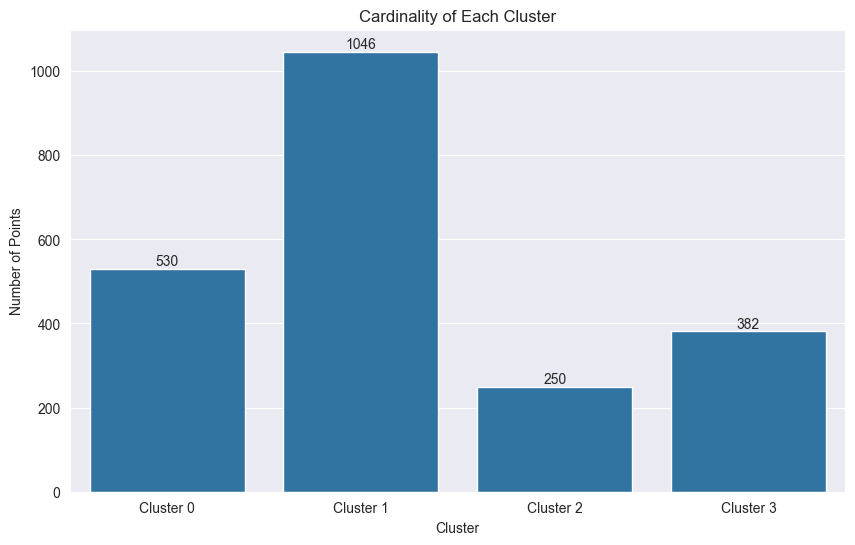

In [12]:
plot_cardinality_cluster_kmeans_number(data_maxabs, 4)

In [13]:
def plot_cardinality_cluster_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        n_clusters = len(set(labels))
        n_noise = list(labels).count(-1)

    cardinality = [list(labels).count(label) for label in unique_labels]
    clusters = ['Noise' if label == -1 else f'Cluster {label}' for label in unique_labels]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=clusters, y=cardinality)
    
    for index, value in enumerate(cardinality):
        ax.text(index, value, str(value), ha='center', va='bottom')
    
    plt.title('Cardinality of Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Points')
    plt.show()

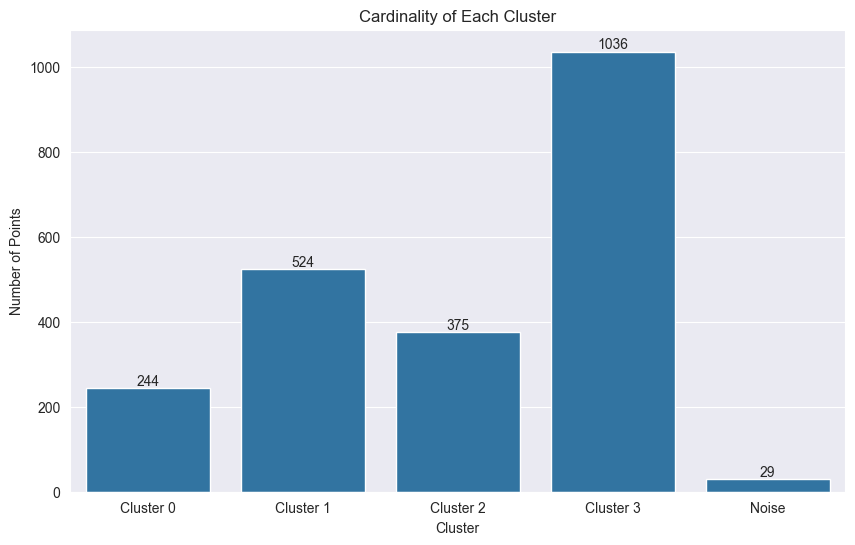

In [14]:
plot_cardinality_cluster_dbscan(data_maxabs, 1.0, len(data.columns) * 2)

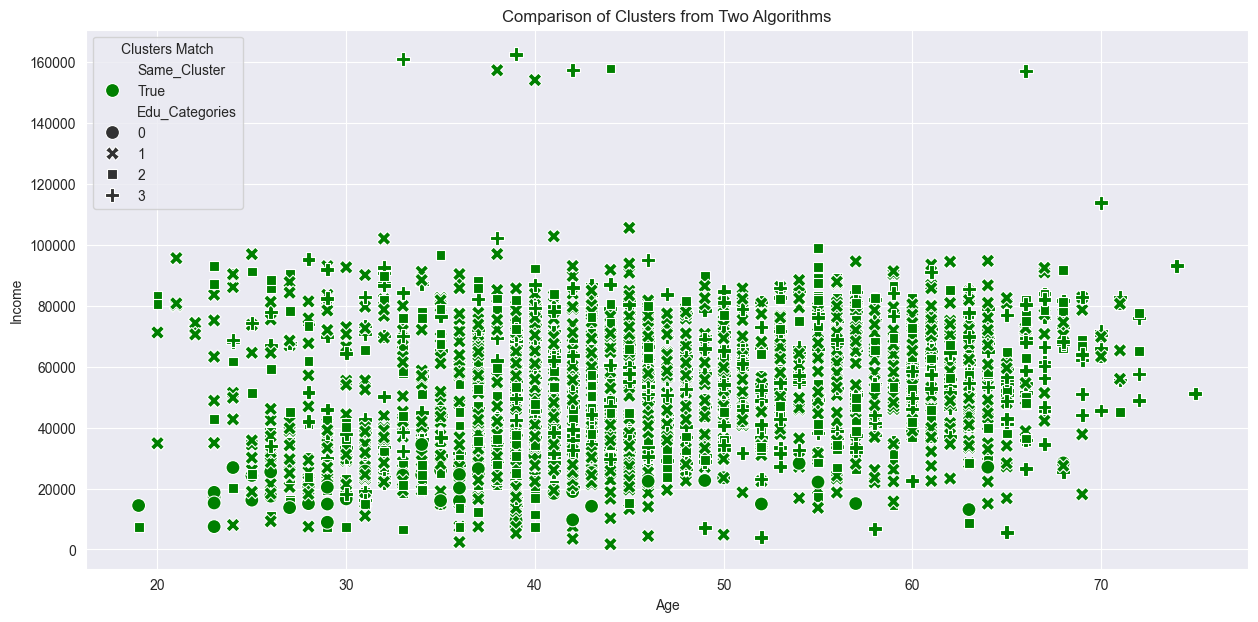

In [15]:
data_compare = data
data_compare['Cluster_Kmeans'] = data_kmeans['Cluster']
data_compare['Cluster_DBSCAN'] = data_dbscan['Cluster']
data['Same_Cluster'] = data['Cluster_Kmeans'] == data['Cluster_DBSCAN']

# Plotting
plt.figure(figsize=(15, 7))

# Define the palette
palette = {True: 'green', False: 'red', -1: 'BLUE'}

# Scatter plot for Cluster_Algo1
sns.scatterplot(x='Age', y='Income', hue='Same_Cluster', style='Edu_Categories', data=data, palette=palette, s=100)
plt.title('Comparison of Clusters from Two Algorithms')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Clusters Match')
plt.show()


In [16]:
data_compare = data
data_compare['Cluster_DBSCAN'] = data_kmeans
data_compare['Cluster_Kmeans'] = data_dbscan
    
data_compare['Same_Cluster'] = data_compare['Cluster_Kmeans'] == data_compare['Cluster_DBSCAN']
# Plotting
plt.figure(figsize=(15, 7))
    
# Define the palette
palette = {True: 'green', False: 'red'}
    
# Scatter plot for Cluster_Algo1
sns.scatterplot(x='Age', y='Income', hue='Same_Cluster', style='Edu_Categories', data=data, palette=palette, s=100)
plt.title('Comparison of Clusters from Two Algorithms')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Clusters Match')
plt.show()

ValueError: Columns must be same length as key

Cross-tabulation of DBSCAN and KMeans cluster assignments:
KMeans    0     1    2    3
DBSCAN                     
-1        6    12    6    5
 0        0     0  244    0
 1      524     0    0    0
 2        0     0    0  375
 3        0  1034    0    2


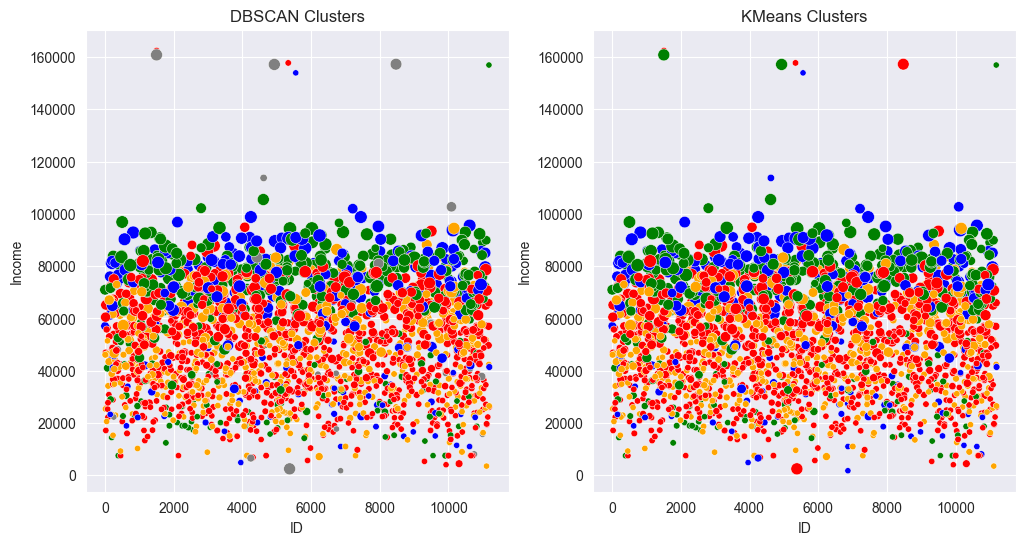

In [19]:
# Step 1: DBSCAN clustering
eps = 1.0
min_samples = len(data.columns) * 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data_dbscan = data.copy()
data_dbscan['Cluster_DBSCAN'] = dbscan.fit_predict(data_maxabs)

# Step 2: KMeans clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
data_kmeans = data.copy()
data_kmeans['Cluster_KMeans'] = kmeans.fit_predict(data_maxabs)

# Step 3: Merge the results
data_combined = data.copy()
data_combined['Cluster_DBSCAN'] = data_dbscan['Cluster_DBSCAN']
data_combined['Cluster_KMeans'] = data_kmeans['Cluster_KMeans']

# Step 4: Analyze the results
# Create a cross-tabulation of the cluster assignments
crosstab = pd.crosstab(data_combined['Cluster_DBSCAN'], data_combined['Cluster_KMeans'], rownames=['DBSCAN'], colnames=['KMeans'])

# Display the crosstab
print("Cross-tabulation of DBSCAN and KMeans cluster assignments:")
print(crosstab)

# Step 5: Visualize the results
# Scatter plot colored by DBSCAN clusters
paletteDB = {-1: 'gray', 0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_combined, x=data_combined.columns[0], y=data_combined.columns[1], hue='Cluster_DBSCAN', palette= paletteDB, size='Spent_Total', sizes=(20, 100), legend=None)
plt.title('DBSCAN Clusters')

# Scatter plot colored by KMeans clusters
paletteK = { 0: 'orange', 1: 'red', 2: 'blue', 3: 'green'}
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_combined, x=data_combined.columns[0], y=data_combined.columns[1], hue='Cluster_KMeans', palette= paletteK, size='Spent_Total', sizes=(20, 100), legend=None)
plt.title('KMeans Clusters')

plt.show()

In [1]:
plt.figure(figsize=(12, 8))

# Iterate through each dataframe
for i, df in enumerate([cluster_0_df, cluster_1_df, cluster_2_df, cluster_3_df]):
    plt.subplot(2, 2, i + 1)  # Create subplot for each dataframe
    sns.countplot(x='Living_Alone', data=df, color='blue', alpha=0.6, label='Living_Alone')
    sns.countplot(x='Marital_Categorie', data=df, color='orange', alpha=0.6, label='Marital_Categorie')
    plt.title(f'Distribution - Cluster {i}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined